# Customer Churn

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv("Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder

df.set_index('customerID', inplace=True)

df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

df = pd.get_dummies(df, drop_first=True)

df.head()

C:\Users\b.yarinko\AppData\Local\Temp\ipykernel_20160\1897355497.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [41]:
X = df.drop('Churn_Yes', axis=1)
y = LabelEncoder().fit_transform(df['Churn_Yes'])

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling of customer churn

### LogisticRegression, RandomForestClassifier, XGBClassifier, SVC

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict_proba(X_test)[:, 1]
log_auc = roc_auc_score(y_test, log_pred)
print(f"ROC AUC for Logistic Regression: {log_auc:.4f}")


ROC AUC for Logistic Regression: 0.8416


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print(f"ROC AUC for Random Forest: {rf_auc:.4f}")


ROC AUC for Random Forest: 0.8246


In [56]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_pred)
print(f"ROC AUC for XGBoost: {xgb_auc:.4f}")


ROC AUC for XGBoost: 0.8280


In [57]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

svm_model = CalibratedClassifierCV(SVC(kernel='linear', probability=True, random_state=42))
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_pred)
print(f"ROC AUC for SVC: {svm_auc:.4f}")


ROC AUC for SVC: 0.8257


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'Gradient Boosting': xgb_model,
    'Support Vector Machine': svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Logistic Regression:
Accuracy: 0.8070, Precision: 0.6584, Recall: 0.5668, F1 Score: 0.6092
Random Forest:
Accuracy: 0.7878, Precision: 0.6280, Recall: 0.4920, F1 Score: 0.5517
Gradient Boosting:
Accuracy: 0.7899, Precision: 0.6182, Recall: 0.5455, F1 Score: 0.5795
Support Vector Machine:
Accuracy: 0.7949, Precision: 0.6431, Recall: 0.5107, F1 Score: 0.5693


### GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV


rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid = {
                                            'n_estimators': [20, 100, 200, 300],
                                            'max_depth': [5, 10, 20, None],
                                            'min_samples_split': [2, 5, 10, 20]
                                        }, 
                            cv=5, scoring='roc_auc')

rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f"Best ROC AUC for Random Forest: {best_rf_auc:.4f}")
print("Best model parameters:", rf_grid_search.best_params_)

################################################################################

log_grid_search = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), 
                           param_grid = {
                                            'C': [0.01, 0.1, 1, 10, 100],
                                            'solver': ['lbfgs', 'liblinear', 'newton-cg', 
                                                       'newton-cholesky', 'saga']
                                        }, 
                            cv=5, scoring='roc_auc')

log_grid_search.fit(X_train, y_train)
best_log_model = log_grid_search.best_estimator_
best_log_auc = roc_auc_score(y_test, best_log_model.predict_proba(X_test)[:, 1])
print(f"Best ROC AUC for Logistic Regression: {best_log_auc:.4f}")
print("Best model parameters:", log_grid_search.best_params_)

################################################################################

xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), 
                           param_grid = {
                                            'n_estimators': [50, 100, 200],
                                            'max_depth': [3, 5, 7],
                                            'learning_rate': [0.01, 0.1, 0.2]
                                        }, 
                            cv=5, scoring='roc_auc')

xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
print(f"Best ROC AUC for XGBoost: {best_xgb_auc:.4f}")
print("Best model parameters:", xgb_grid_search.best_params_)

################################################################################

svm_grid_search = GridSearchCV(SVC(kernel='linear', probability=True, random_state=42), 
                           param_grid = {
                                            'C': [0.01, 0.1, 1, 10, 100],
                                            'gamma': ['scale', 'auto']
                                        }, 
                            cv=5, scoring='roc_auc')

svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_
best_svm_auc = roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1])
print(f"Best ROC AUC for SVC: {best_svm_auc:.4f}")
print("Best model parameters:", svm_grid_search.best_params_)


Best ROC AUC for Random Forest: 0.8439
Best model parameters: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 300}
Best ROC AUC for Logistic Regression: 0.8407
Best model parameters: {'C': 10, 'solver': 'liblinear'}
Best ROC AUC for XGBoost: 0.8465
Best model parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best ROC AUC for SVC: 0.8295
Best model parameters: {'C': 0.01, 'gamma': 'scale'}


In [49]:
models = {
    'Logistic Regression': best_log_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_xgb_model,
    'Support Vector Machine': best_svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Logistic Regression:
Accuracy: 0.8027, Precision: 0.6509, Recall: 0.5535, F1 Score: 0.5983
Random Forest:
Accuracy: 0.8027, Precision: 0.6644, Recall: 0.5187, F1 Score: 0.5826
Gradient Boosting:
Accuracy: 0.8020, Precision: 0.6644, Recall: 0.5134, F1 Score: 0.5792
Support Vector Machine:
Accuracy: 0.7942, Precision: 0.6329, Recall: 0.5348, F1 Score: 0.5797


## Churn Period

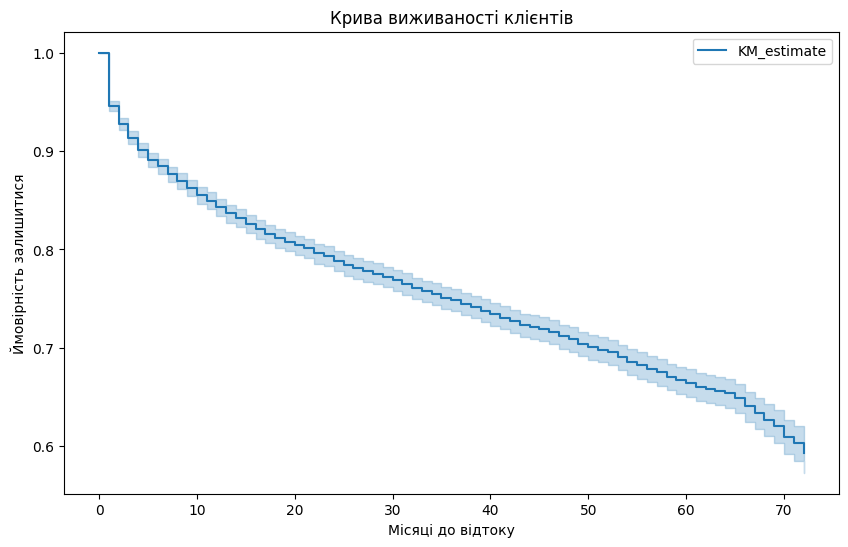

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'time_to_churn'
                event col = 'churn_event'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12800.45
         time fit was run = 2024-11-19 11:30:21 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
MonthlyCharges     0.05      1.06      0.00            0.05            0.06                1.05                1.06
TotalCharges      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Contract_One year -1.74      0.18      0.10           -1.93           -1.55                0.15                0.21
Contract_Two year -4.54      0.01      0.19           -4.91           -4.18                0.01                0.02

                   cmp to      z      p  -log2(p)
covariate                                        
MonthlyCharges       0.00  36.00 <0.005    940.43
TotalCharges         0.00 -43.72 <0.005       inf
Contract_One year    0.00 -17.94 <0.005    236.75
Contract_Two year    0.00 -24.40 <0.005    434.23
---
Concordance = 0.92
Partial AIC = 25608.90
log-likelihood ratio test = 5705.17 on 4 df
-log2(p) of ll-ratio test = inf

In [62]:
from lifelines import KaplanMeierFitter, CoxPHFitter

# Створення змінної "час до відтоку"
df['time_to_churn'] = df['tenure']  # tenure вказує місяці перебування клієнта

# Бінарна змінна для події (1 = відтік, 0 = залишився)
df['churn_event'] = df['Churn_Yes'].astype(int)

# Kaplan-Meier Model
kmf = KaplanMeierFitter()
kmf.fit(durations=df['time_to_churn'], event_observed=df['churn_event'])


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Крива виживаності клієнтів")
plt.xlabel("Місяці до відтоку")
plt.ylabel("Ймовірність залишитися")
plt.show()

# Cox Proportional Hazards Model
# Вибір змінних для моделі
cox_data = df[['time_to_churn', 'churn_event', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year']]
cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='time_to_churn', event_col='churn_event')

# Результати моделі
cox_model.print_summary()

# Прогноз часу до відтоку для кожного клієнта
df['predicted_time_to_churn'] = cox_model.predict_expectation(cox_data)


## Calculation of Losses

c:\Users\b.yarinko\Desktop\Code\customer_churn\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


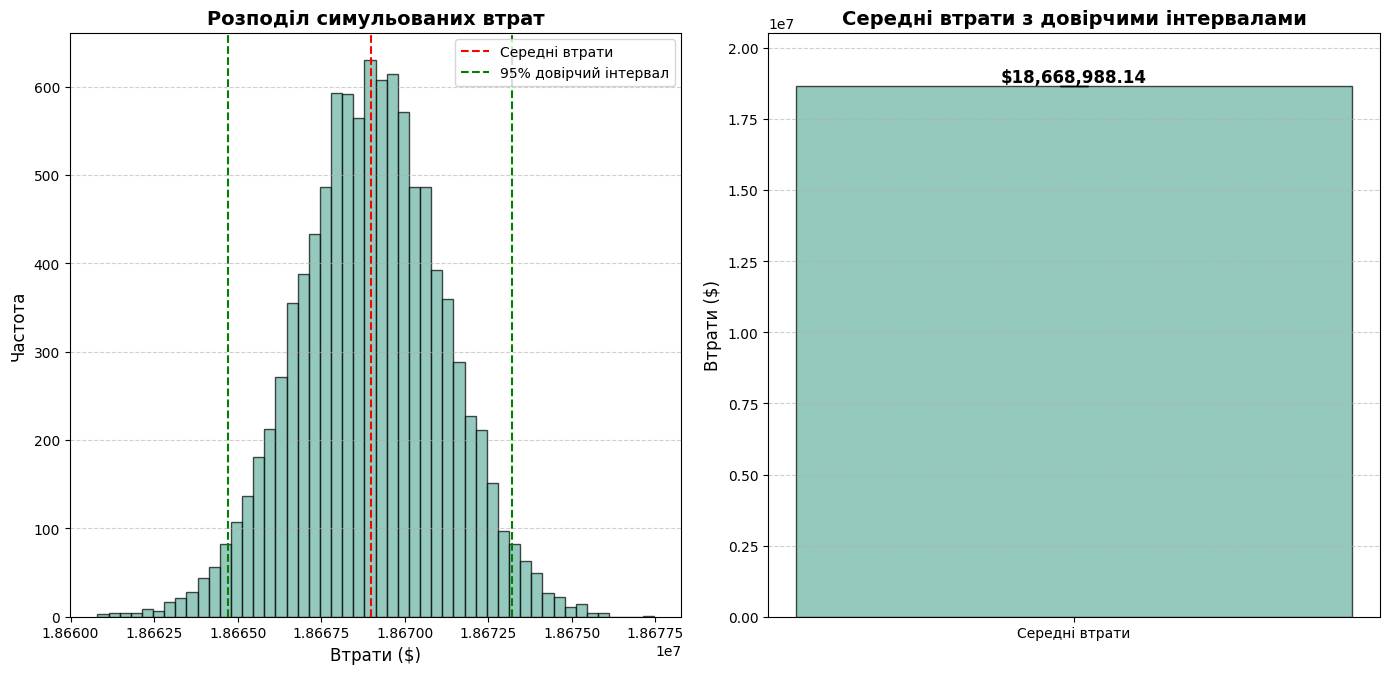

Прогнозовані втрати внаслідок відтоку: $18,668,988.1383
95% довірчий інтервал: ($18,664,700.3226, $18,673,219.7401)


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Додавання ймовірності відтоку (з попередньої моделі)
df['churn_probability'] = best_log_model.predict_proba(X)[:, 1]

# Розрахунок втрат
df['predicted_loss'] = df['MonthlyCharges'] * df['predicted_time_to_churn'] * df['churn_probability']

# Метод Монте-Карло для моделювання можливих втрат
num_simulations = 10000
simulated_losses = []

for _ in range(num_simulations):
    # Генерація випадкових ймовірностей відтоку для кожного абонента
    random_probabilities = np.random.binomial(1, df['churn_probability'])
    # Розрахунок втрат для кожного абонента
    simulated_loss = (df['MonthlyCharges'] * df['predicted_time_to_churn'] * random_probabilities).sum()
    simulated_losses.append(simulated_loss)

# Розрахунок середніх та 95% довірчих інтервалів для можливих втрат
mean_loss = np.mean(simulated_losses)
lower_bound = np.percentile(simulated_losses, 2.5)
upper_bound = np.percentile(simulated_losses, 97.5)

# Покращена візуалізація результатів
plt.figure(figsize=(14, 7))

# Гістограма розподілу симульованих втрат
plt.subplot(1, 2, 1)
plt.hist(simulated_losses, bins=50, color='#69b3a2', edgecolor='black', alpha=0.7)
plt.axvline(mean_loss, color='red', linestyle='dashed', linewidth=1.5, label='Середні втрати')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1.5, label='95% довірчий інтервал')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1.5)
plt.title('Розподіл симульованих втрат', fontsize=14, fontweight='bold')
plt.xlabel('Втрати ($)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Графік середніх втрат та довірчих інтервалів
plt.subplot(1, 2, 2)
plt.bar(
    ['Середні втрати'], 
    [mean_loss], 
    color='#69b3a2', 
    yerr=[[mean_loss - lower_bound], [upper_bound - mean_loss]], 
    capsize=10, 
    edgecolor='black',
    alpha=0.7
)
plt.text(0, mean_loss, f"${mean_loss:,.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title('Середні втрати з довірчими інтервалами', fontsize=14, fontweight='bold')
plt.ylabel('Втрати ($)', fontsize=12)
plt.ylim(0, upper_bound * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print(f"Прогнозовані втрати внаслідок відтоку: ${mean_loss:,.4f}")
print(f"95% довірчий інтервал: (${lower_bound:,.4f}, ${upper_bound:,.4f})")
